In [3]:
library(zoo)
library(neuralnet)
library(randomForest)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



# Чтение и предварительная работа с данными

In [4]:
data <- read.csv("VAR15.csv", header=TRUE, sep = ';')
data <- data[ ,3:6]

In [5]:
head(data)

,ROSNEFT,BRENT,GAZPROM,USD_RUB
,<int>,<dbl>,<int>,<int>
1,37936,40.20,18075,76036
2,38073,40.53,18229,75934
3,38186,40.90,18256,75870
4,38222,40.90,18330,75738
5,38222,40.69,18375,75758
6,38590,40.69,18393,75727


In [6]:
tail(data)

,ROSNEFT,BRENT,GAZPROM,USD_RUB
,<int>,<dbl>,<int>,<int>
292,38009,42.55,16774,77612
293,38090,42.49,16794,77581
294,38059,42.50,16772,77538
295,38175,42.31,16832,77813
296,38224,42.60,16872,77676
297,38108,42.54,16859,77732


___________

# Переход к доходностям

In [7]:
r <- apply(data, 2, function(z) rollapply(z, 2, function(x) x[2]/x[1] - 1))
r

ROSNEFT,BRENT,GAZPROM,USD_RUB
0.0036113454,0.0082089552,8.520055e-03,-1.341470e-03
0.0029679826,0.0091290402,1.481156e-03,-8.428372e-04
0.0009427539,0.0000000000,4.053462e-03,-1.739818e-03
0.0000000000,-0.0051344743,2.454992e-03,2.640682e-04
0.0096279630,0.0000000000,9.795918e-04,-4.091977e-04
0.0048976419,-0.0041779307,2.664057e-03,1.663872e-03
0.0007220403,-0.0002467917,-1.789394e-03,-1.436990e-03
-0.0006184451,0.0096272525,3.639524e-03,-1.095796e-03
0.0023206044,0.0073349633,1.894349e-03,-5.551077e-04
0.0010289918,0.0009708738,-1.620658e-04,5.818643e-04


_____________

In [35]:
get_prices <- function(start, r)
{
  price <- rep(NA, length(r) + 1)
  price[1] <- start
  for(i in 2:length(price))
    price[i] <- (r[i-1] + 1)*price[i-1]
  return(price)
}

plot_price <- function(orig, pred, name)
{
  price <- get_prices(orig[1], pred)
  rmse <- sqrt( mean( (orig - price)^2 ) )
  plot(orig, type = 'l', lwd = 2, xlab = 'Time', ylab = 'ROSNEFT', col = 'purple4',
       main = paste(name, 'RMSE', round(rmse, 2)))
  lines(price, lwd = 2, col = 'seagreen3')
}

понадобится позже для сравнения методов в смысле минимума среднего квадрата ошибки

__________

# График RMSE к Number of Neurons in Hidden Layer

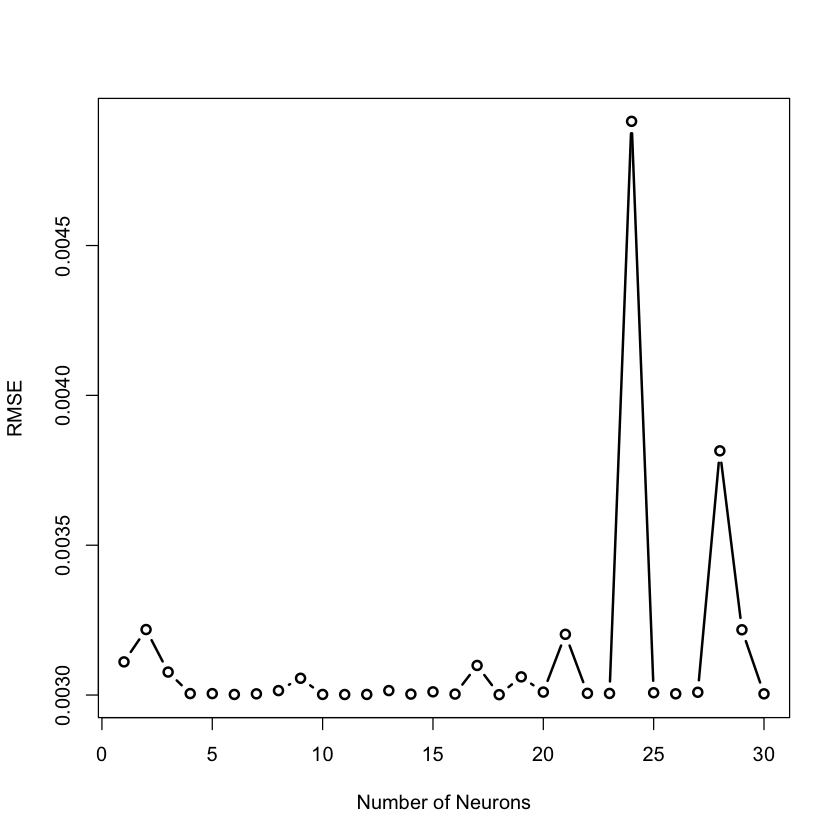

In [44]:
calc_rmse <- function(n)
{ 
  nn <- neuralnet(ROSNEFT ~ .,
                  data = r, 
                  err.fct = 'sse',
                  hidden = n) 
  pred <- predict(nn, newdata = r[ ,2:4], type = 'response')
  return( sqrt( mean( (r[ ,1] - pred
                      )^2 ) ) )
}

set.seed(0)
err <- sapply(1:30, calc_rmse)
plot(err, type = 'b', lwd = 2, xlab = 'Number of Neurons',
     ylab = 'RMSE')
best_nhidden <- which.min(err)


In [45]:
which.min(err)

[1] 18

_____________

# Попытки обучения перцептрона со скрытым уровнем

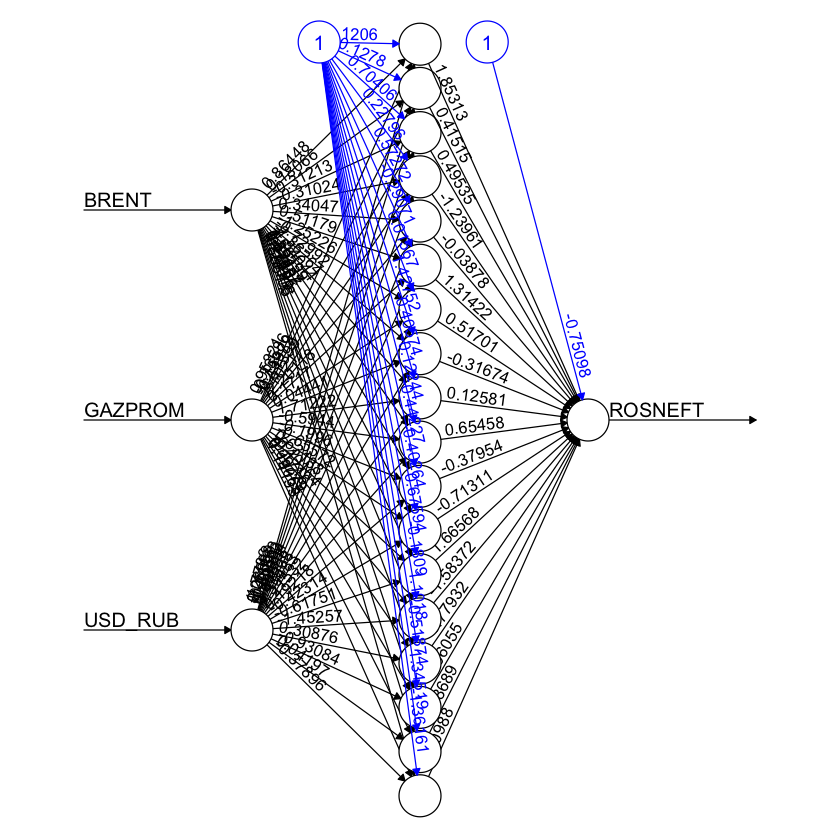

In [46]:
nn <- neuralnet(ROSNEFT ~ .,
                data = r,
                err.fct = 'sse',
                hidden = best_nhidden,
                rep = 2)
plot(nn, rep = 'best')

_____________

# Neural Network Prediction

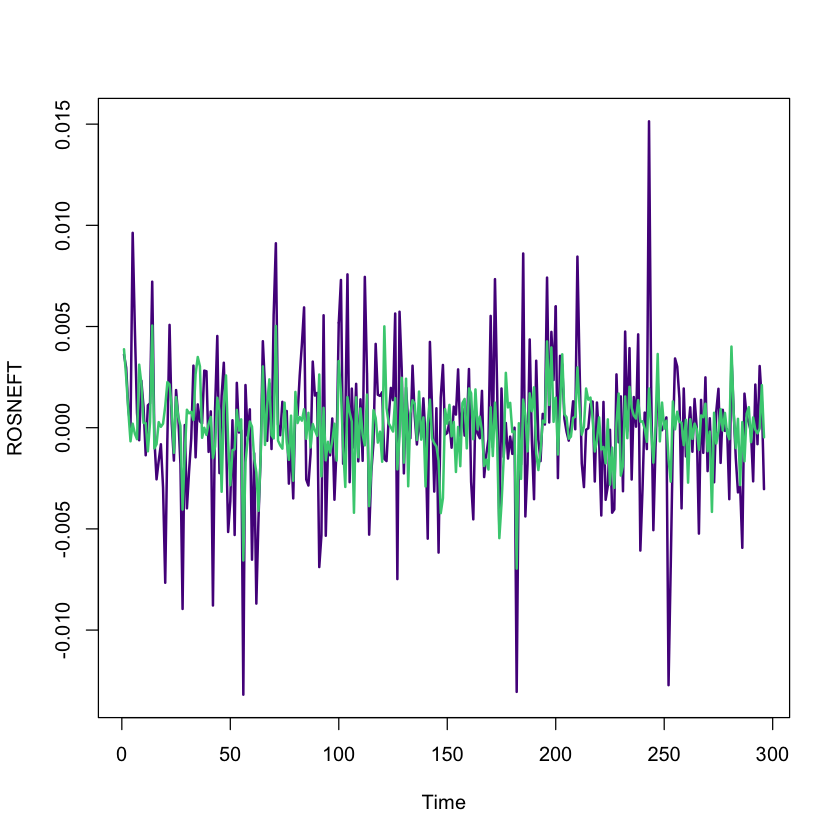

In [37]:
nn_pred <- predict(nn, newdata = r[ ,2:4], type = 'response')
plot(r[ ,1], type = 'l', lwd = 2, xlab = 'Time', ylab = 'ROSNEFT', col = 'purple4')
lines(nn_pred, col = 'seagreen3', lwd = 2)

_______________

# График зависимости ошибки от количества деревьев

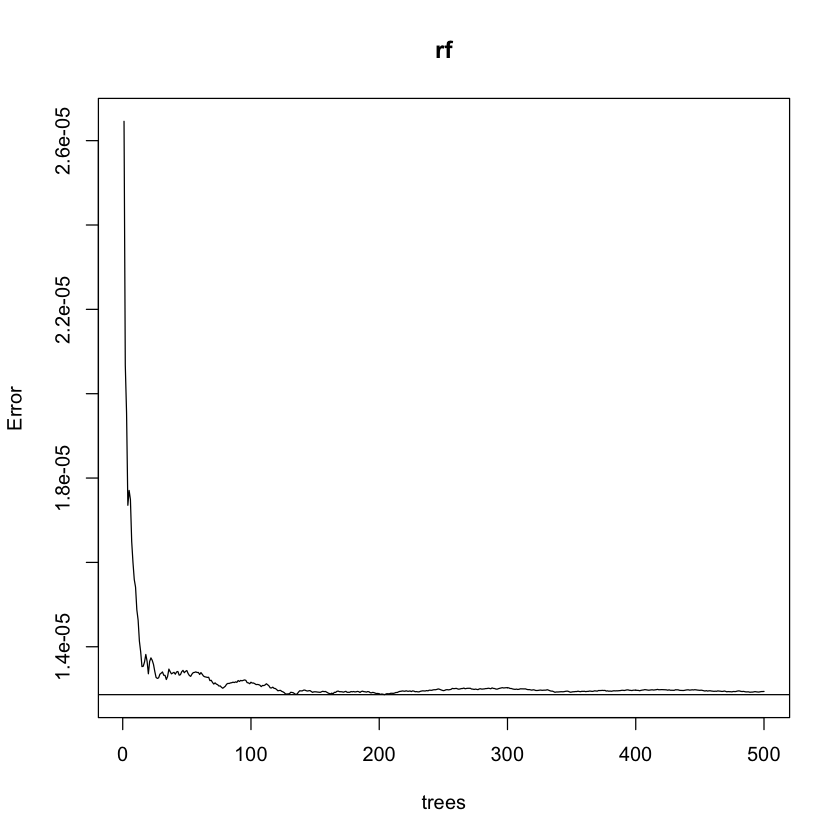

In [38]:
set.seed(0)
rf <- randomForest(GAZPROM ~ .,
                   data = r,
                   ntree = 500)
prf <- plot(rf)
best_ntree <- which.min(prf)
abline(h = prf[best_ntree])

In [39]:
which.min(prf)

[1] 204

_______________

# Linear Model Prediction

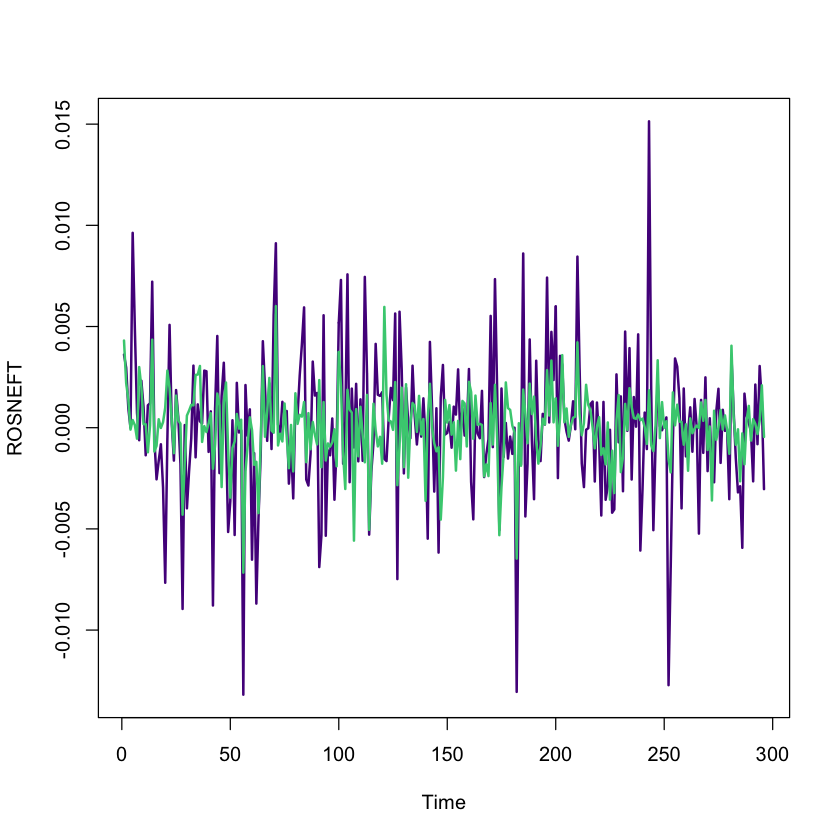

In [40]:
lm <- lm(ROSNEFT ~ ., data = as.data.frame(r))
lm_pred <- predict(lm, newdata = as.data.frame(r[ ,2:4]))
plot(r[ ,1], type = 'l', lwd = 2, xlab = 'Time', ylab = 'ROSNEFT', col = 'purple4')
lines(lm_pred, col = 'seagreen3', lwd = 2)

__________________

# Random Forest Prediction

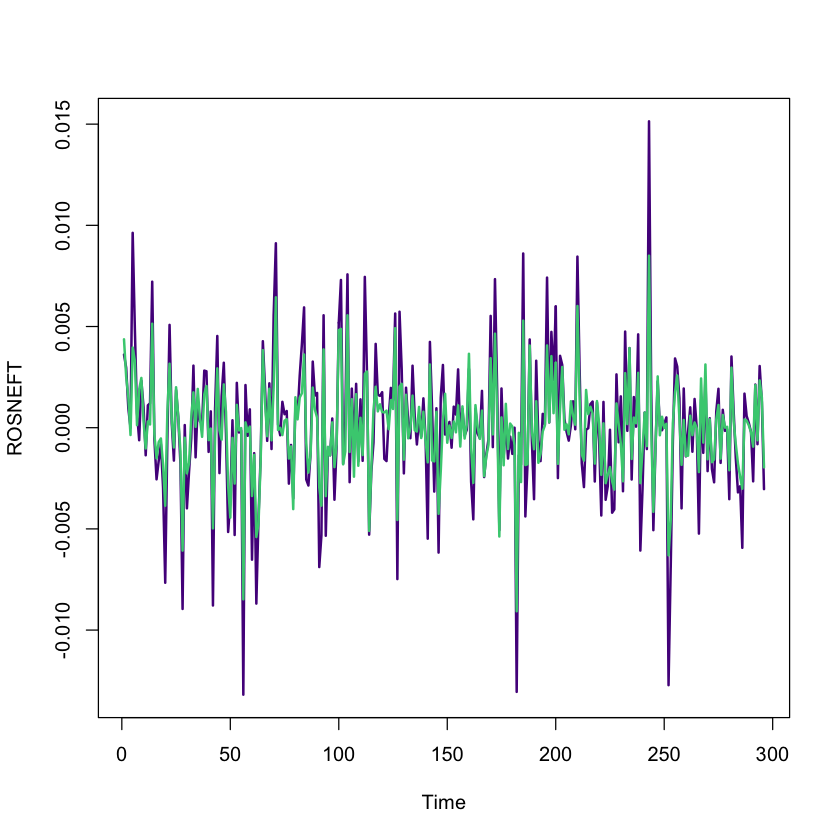

In [41]:
best_rf <- randomForest(ROSNEFT ~ .,
                        data = r,
                        ntree = best_ntree)
rf_pred <- predict(best_rf, newdata = r[ ,2:4])
plot(r[ ,1], type = 'l', lwd = 2, xlab = 'Time', ylab = 'ROSNEFT', col = 'purple4')
lines(rf_pred, col = 'seagreen3', lwd = 2)

____________

# Графическое сравнение моделей

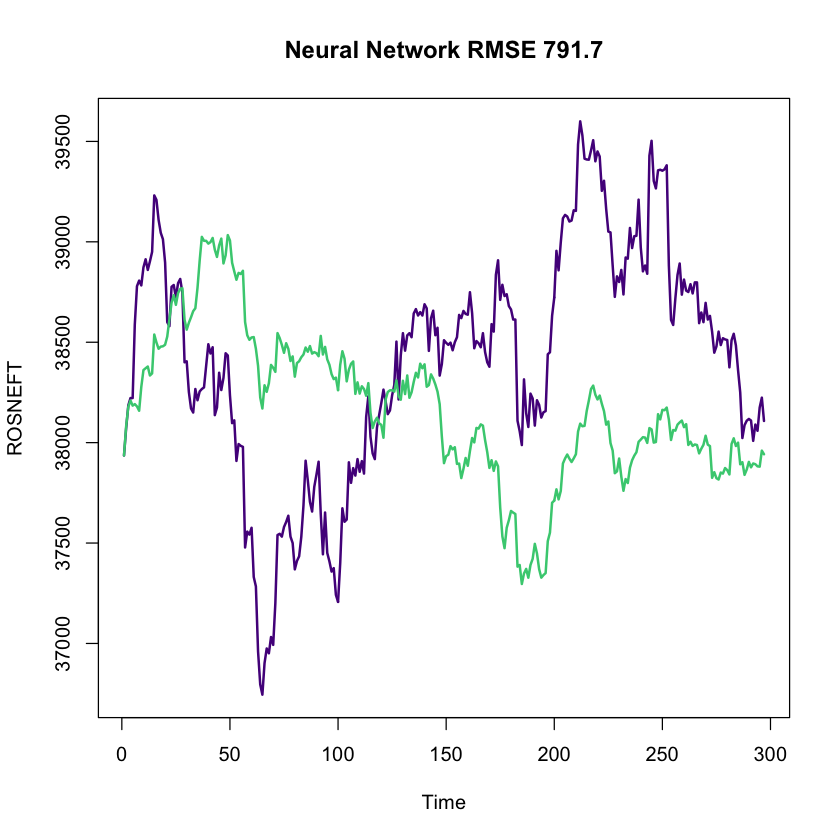

In [42]:
plot_price(data[ ,1], nn_pred, 'Neural Network')

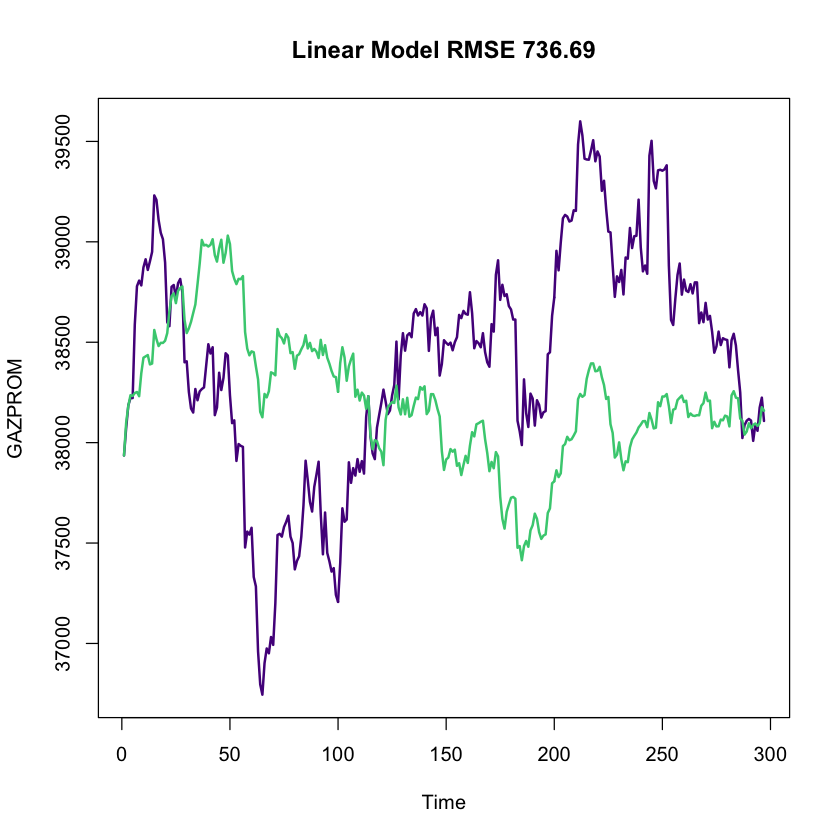

In [28]:
plot_price(data[ ,1], lm_pred, 'Linear Model')

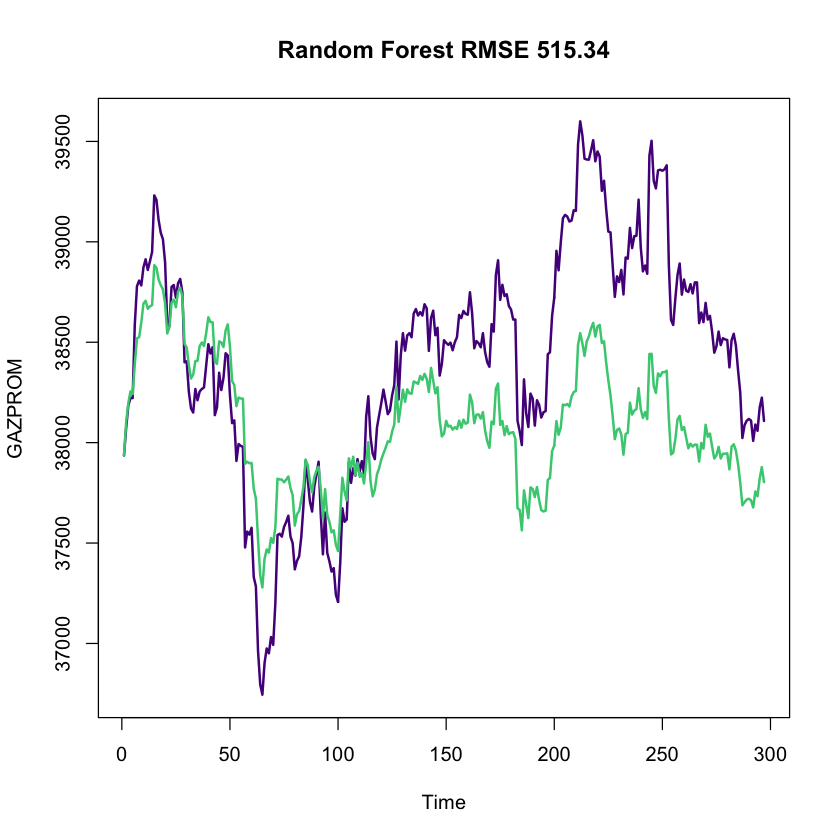

In [29]:
plot_price(data[ ,1], rf_pred, 'Random Forest')

+ Какой метод дает наилучшие результаты в смысле минимума среднего квадрата ошибки ? 

Random Forest